# Motivation

**What is your dataset?** 

Our data is a collection of datasets relating to bicycles and bicycle infrastructure. They display temporal and geospatial patterns in both bicycle use and bicycle infrastructure/infrastructure requests. Namely, we have:

* Bike counts from counting stations
* Locations of counting stations
* Bicycle parking counts
* NYPD Complaint Data Current (Year To Date)
* Requests for in-building bicycle parking
* New York City Population By Community Districts
* Geojson of community district boundaries

**Why did you choose this/these particular dataset(s)?**

Bicycles are close to our hearts and coming from Copenhagen, a proud bicycle city we wanted to examine how other cities are succeeding in transforming to a more bicycle heavy traffic landscape. Initially we wanted to compare biking in multiple cities, but we had a hard time finding quality datasets of other cities that would make for a relevant comparison. We therefore chose to take a deep dive into multiple facets of biking within New York City due to the number of available and high quality datasets from [NYC Open Data](https://opendata.cityofnewyork.us/). We started out with analyzing the bicycle counting data, but quickly realised that the spatial takeaways from this dataset was limited. We therefore expanded our scope, and dove headfirst into other potentially relevant data sets like parking, crimes and requests. These datasets proved more fruitful and we began constructing our plots and tying everything together in a coherent narrative. One thing all the sets have in common is that they contain geospatial data that allowed us to present the data in interactive chloropleth maps and timeseries.

**What was your goal for the end user's experience**
First of all we wanted to tell a story about how getting more bicycle traffic (which is good for a large number of well known reasons) depends on having appropriate infrastructure. What we wanted to create was a narrative data visualization that showed the spatial and chronological development of New Yorks attempt to become a bicycle city. We furthermore wanted to tell the reader a story by showcasing how many different kinds of data, collected via different methods and maybe not obviously related by anything else than the overarching theme of bicycles, could create a narrative that gave a more hollistic view than any of the datsets themselves could.


# Basic stats. Let's understand the dataset better

**Write about your choices in data cleaning and preprocessing**

Overall we have chosen similar temporal ranges for our data to make it more easily compareable. This is done for nearly all datasets, to only include years with solid data collection and to only cover the last two decades or so. 

One of the major challenges regarding all of the datasets was matching the point data of e.g. parking locations or bike thefts to the polygon data of the district boundaries. Here ensuring a that the coordinate systems matched while also ensuring the integrity of matching  district name codes with the correct district numbers and boroughs names, while filtering and slicing the datat was fairly challenging. 


### Bike counts and counting stations
For the bike counts and counting stations, the first fairly simple bar plot required no data treatment, apart from sorting and counting. But the maps required a fair deal of works and included the following steps:
1. We started by matching the bike counts with the counting station data, as all counts were logged with a specific ID referencing back to the counting station. 
2. The counting station dataset now contained the coordinates of the counting station location which we could then translate into a point geometry object and transform the dataset into a geopandas dataframe. 
3. This allowed us to then spatially join the counting data now also containing coordinate location of the count with the district boundary polygons from the geojson file again using geopandas. 
4. Now the data cointained the counts, along with the number of the district they where counted in, and we could then format the time and plot the data in a chloropleth map showing the number of counts in each district per year from 2000 to 2023.
5. Finally because the district boundary geojson file didn't contain the names of the districts but only the numbers, we created a dictionary based on the community district population dataset that mapped the district number to the correct district name and borough name. This allowed us to add these to the data before plotting and have them show when hovering over the district when interacting with the chloropleth map

### Bike parking data
The process of processing the parking data was very similar to the bike counts, but because the data already contained the coordinate locations we could skip the first step. The data contained the number of **new** parkings established, but because we were more interested in the development of **total** bike parkings over time we changed the data into displaying the cumulative count of new parkings since the beginning of the dataset. At this point we also added the district populations from the communmity data to the datasets. *A quick note on the timeframe of the data: Allthough the data contained rows from before 2000 these made up less than 0.01% of data and didn't make for any good visual representation of the timeseries map, and we therefore chose to only use from 2000 and ahead.*

### NYPD Complaint Data Current
Again the final data processing used for the bike crime map, was similar to that of the parking and counting data, but before we could do that we had to extract out the relevant part of the data that had to do with biking, as the data set contained all registered crimes - very similar to the SF dataset used during clas. Here we began by identfying the bike related crimetypes and sliced the data for these, we then had to again match the data to the districts like before. In order to be able to plot the data in the interactive bokeh bar plot, we also had to translate the district numbers into an artificial series running from 1 to N in order to plot the data without it being spaced out on the x-axis. We could then plot the data based on the bike crime type utilizing the ability of the bokeh plot to toggle on and off multiple bar plots displayed in the same plot. Finally we also plotted the data in a chloropleth map similar to the previous ones, but this time as a static map only displaying the year 2024. Here it might make sense to say that although the crime data didn't match the timeframe from the previous plots it was more a question of how the different districts compared than the total number of crimes, we therefore prioritized recent data.

**Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**

Below is a table of the datasets we used.

| Data set name | Description | Data format | Rows | Columns | Size | Link | Support data |
|---|---|---|---|---|---|---|---|
| Bicycle Counts New york | Counts as a function of counter stations<br>-32 stations<br>2012 to now | CSV | 5400000 | 5 | 246Mb | https://data.cityofnewyork.us/Transportation/Bicycle-Counts/uczf-rk3c/about_data | NYC Open Data (NYC Bicycle Counters) |
| Bicycle Parking New york | Locations of parking shelters<br>Types of shelter<br>Coordinates<br>-Bike Program<br>-Adress<br>Point Data | GeoJson & CSV | 31673 | 23 | 20mb | https://data.cityofnewyork.us/Transportation/Bicycle-Parking/yh4a-g3fj |  |
| Bikes in Buildings Requests | Contains applications for in-building<br>bicycle parking submitted to the city<br>-Applicant information<br>- Building owner information<br>-Application date<br>-Various information on the<br>application and dates related<br>to processing | CSV | 2.365 | 54 | 1067 kB | https://data.cityofnewyork.us/Transportation/Bikes-in-Buildings-Requests/scjj-6yaf/about_data |  |
| New York City Population By Community Districts | Population of NYC by Community Districts | XLSX | 59 | 8 |  | [https://www.nyc.gov/site/planning/planning-level/nyc-population/nyc-population.page](https://www.nyc.gov/site/planning/planning-level/nyc-population/nyc-population.page) | |
| NYPD Complaint Data Current (Year To Date) | Crimes reported to NYPD (2019) | CSV | 137,000 | 36 | Not specified | [https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i) | |






# Data Analysis

**Describe your data analysis and explain what you've learned about the dataset.**

* New york bike counts:
    * The data seems to be dependent on counting stations and is very inconsistent and dosen't portray a very good picture of New york as a whole as stations are limited to certain districts and not equally distributed throughout the city. When analysing the distribution over time it does not agree with surveys that portray a more linear growth, which we learned after contemplating the fairly volatile nature of the counts over time and searched within other sources like articles.
* New york bicycle parking (in building) requests:	
    * This data was very straight forward but also displayed an unusual trend. Beyond varying seasonally, it was also declining exponentially year over year. This led us to look at to the idea that the public infrastructure might be working well enough and that there therefore is a lower need for this type of parking. Articles we found on the area suggested that there still was a big demand for more infrastructure (parking) and we can therefore conclude that other forces might be at play. It could be due to changes in regulation or that there was only a small amount of buildings that qualified for the request to begin with. It was not possible to find further information within this area. 
* Bicycle parking NY
    * This dataset was a key component in our story as it gave both a chronological and geographical understanding of infrastructure investments in the city. It was an overall very high quality dataset, with the only issue being a few outliers logged several decades ago. This was however easy to filter out and after translating the data into cumulative counts - It gave a very good understanding of the distribution and how this is connected to the wealth disparity as well.
* NYPD Complaint Data Current (Year To Date)
    * This dataset gave us the information on bike theft in the city. It contained a lot of information that we did not use, so a lot of filtering was used here both to only show the relevant crimes but also to only show data for 2024 as we wanted to see the result of the the investments so far. It gave us an interesting perspective on infrastructure vs safety
* New York City Population By Community Districts
    * We primarily used this dataset in relation to others as supporting data. We used it to do pr. capita calculation and to get information on all the neighborhoods. 
* Bicycle Parking Shelters
    * This dataset had very few datapoints so it was barely used, we did use it to examine if this fit the other tendencies but it did not underline any particular conclusion. It was a log of a very specific type of bicycle parking and as such the overall bicycle parking data was a better option for examining the erected infrastructure



# Genre. Which genre of data story did you use?
We chose to do a magazine style story as we felt it best supported our narrative, and worked very well with the map style visualisations that we used. Because our article was very exploratory in its nature it also allowed us to somewhat control the chronology of the reader while still letting them explore individual plots in their own tempo.

**Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?**

* **Visual Structuring**
    * Consistent Visual Platform
        * The website is consistent in its visual elements and we use consitent colourscales to create coherence
    * Splash screen
        * We put some relevant headlines all together in a picture to showcase we we thought it was interesting and to captivate the reader
* **Highlighting**
    * Zooming
        * The maps allow zoomin to give a user-driven highlight
* **Transition Guidance** 
    * As i understand these tools pertain more to a video format as they talk about cuts, audio etc. To guide the transition we used the text to put the reader in the right mindset for the next bit of information



**Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?**

* **Ordering**
    * Linear
        * The overall structure of the arlicle was linear. This allowed us to have a more straightforward narrative where we could hold the reader by the hand
* **Interactivity**
    * Hover Highlighting / Details
        * As there is a lot of information behind each plot (especially the cloropleths) we made a hover function in all of them that allowed users to view this information withou making the plot too confusing and overstimulating it by showing all the information constantly
    * Filtering / Selection / Search
        * We used this via the bokeh plot (filtering) to show how the crime distributes unevenly across the city and that the type of crime dominating the picture depends on the area
* **Messaging**
    * Captions / Headlines
        * We used headlines throughout the story to distingguish between tdifferent phases of the narrative and to guide the user to know what topic was going to be handeled
    * Accompanying Article
        * We used text to accompany the visualization to help people understand what they were seeing and how it ties into the general story
    * Introductory Text
        * We primed the reader for each plot by first explaining the relevance and setting up a question for it to answer
    * Summary / Synthesis
        * We sythesized conclusions for each plot and supported with articles. This allowed us to help the reader understand what we were wanting them to understand and shape the narrative. 


# Visualizations.

**Explain the visualizations you've chosen.**

We chose to go with an array of different visualizations to display different elements of the data.

* Bar plots for displaying simple temporal trends (request for parking in building) as it delivered the fidelity we needed to understand the development.
* Line graph for displaying temporal trends where the overall tendency was more interesting than the individual yearly data (also lower resolution).
* Cloropleth maps have been used to show the geospatial component of both bicycle use and erection of infrastructure as well as the population within the districts we talk about.
* Cloropleth time series to show the temporal dimension along with the geospatial data.
* Bokeh bar plot to give interactive representation of thefts to show distribution within the city.

**Why are they right for the story you want to tell?**

The combination of plots that we chose helped us display the two interesting dimensions that we wanted to work with. Geospatial and temporal data. Their distribution allows us to tell the full story of how its developing and how this development is spread out within the city. The mapstyle plots furthermore help draw in the reader as they are naturally very visually engaging especially when utilizing strong colors and timeseries resulting in dynamic plots. Similarly having the plots be interactive by allowing to toggle between different views(Bokeh) and analyse district specific data by hovering(chloropleth) the plots allowed the reader to conduct their own investigation along with the one facillitated by the article.




# Discussion. Think critically about your creation

**What went well?**

We managed to explore the topic well with the available resources and managed to be critical at every turn of our conclusions and attempt to back it up with articles etc. We also were effective in finding new resources when the ones we started working with were not showing the full picture. Overall we are satisfied with the amount of interesting patterns we could pull out of the available data and how we managed to create a coherent narrative from them.

**What is still missing? What could be improved?, Why?**

There is definitely more to be wished for in regards to the data we worked with. We were not able to tell the story we initially wanted to tell due to the way in which the data had been collected. This forced us to think in new directions and the story therefore took on a different narrative than originally expected. It was initially meant to be a comparative analysis of CPH vs NY but as data collection methods varied too much, it was not possible for us to make the comparoson and therefore we chose to zoom in on New York which had the better data available. 




# Contributions. Who did what?

Both group members were involved in more or less all project work, the responsible for each element is outlined below.

**Viktor s193981**
* Github page management
* Plots for:
    * Bicycle counts
    * Bicycle theft
    * Bicycle Parking 
    
**Thor s193964**
* Structure and text for website
* Explainer notebook
* Plots for:
    * Parking in building requests
    * Bicycle counts


# Code and plotting
**The cells below contains all of the code used for creating the plots.**
 
It can seem fairly unstructured and overwhelming but we have put in an effort to group together different functionalities of the plot, so that e.g. the geospatial joining of the different datasets happens within the same cell. The structure is as follows:
1. Loading of modules used for visualisations
2. Loading in datasets 
3. Geospatial matching
4. Formatting time
5. Additional formatting of parking data
6. Adding secondary plot information
7. Additional formatting of bike crime plot data
8. Plotting chloropleth of bike parkings per person
9. Plotting chloropleth of bike parkings 
10. plotting chloropleth of bike counts
11. Plotting chloropleht of bike crimes
12. Plotting Bokeh plot of bike crimes
13. Plotting polar plot of bike counts
14. Plotting parking/person per borough ratio bar plot

In [1]:
##1##   LOADING MODULES####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px
from bokeh.plotting import figure, save ,show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import output_notebook
import pandas as pd
from bokeh.palettes import Spectral6
from shapely import wkt

C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\1490425340.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
##2##   LOADING IN DATASETS####
##Bicycle count data
Base_data_counts = pd.read_csv("Bicycle_Counts.csv")
##Bicycle counter data
Base_data_counters = pd.read_csv("Bicycle_Counters.csv")
##Bicycle parking data
Bicycle_parking_data = pd.read_csv("BicycleParking.csv")
### Importing community district data
CD_data = pd.read_csv("population_by_district.csv")

## Importing district boundaries
theft_data = pd.read_csv("theft_data.csv")
###EXTRACTING DATA FROM CRIME COMPLAINTS DATA SET
focus_crimes = ['LARCENY,PETIT OF BICYCLE','LARCENY,GRAND OF BICYCLE','ROBBERY,BICYCLE']
columns_of_interes = ['PD_DESC','Latitude','Longitude','New Georeferenced Column','CMPLNT_FR_DT']
bicycle_theft_data = theft_data[theft_data['PD_DESC'].isin(focus_crimes)][columns_of_interes]


C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\4085533289.py:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  theft_data = pd.read_csv("theft_data.csv")


In [3]:
##3## GEOSPATIAL MATCHING - COMBINING COORDINATE DATA TO DISTRICT BOUNDARIE POLYGONS####
##Loading in district boundary polygons for mapping the data to the districts
NYC_districts = gpd.read_file('CommunityDistricts.geojson')
##setting the coordinate system to ensure compatibility with data coordinates
NYC_districts.to_crs(epsg=4326, inplace=True)

##Extracting out bike counter coordinates along with IDs
coordinates_counters = Base_data_counters[['id','latitude', 'longitude']]
##making geometry column from coordinates 
geometry_parking = [Point(xy) for xy in zip(Bicycle_parking_data['X'], Bicycle_parking_data['Y'])]
geometry_counters = [Point(xy) for xy in zip(coordinates_counters['longitude'], coordinates_counters['latitude'])]
bicycle_theft_data['geometry'] = bicycle_theft_data['New Georeferenced Column'].apply(wkt.loads)

##adding it to parking data and making gpd dataframe
bicycle_parkings_gdf = gpd.GeoDataFrame(Bicycle_parking_data, geometry=geometry_parking)
bicycle_counters_gdf = gpd.GeoDataFrame(coordinates_counters, geometry=geometry_counters)
bicycle_theft_data = gpd.GeoDataFrame(bicycle_theft_data, geometry='geometry')

# Setting the coordinate system
bicycle_parkings_gdf.crs = 'EPSG:4326'
bicycle_counters_gdf.crs = 'EPSG:4326'
bicycle_theft_data.crs = 'EPSG:4326'

#Performing a spatial join matching the parking data with the district boundaries so that data is paired with each district
bicycle_parkings_with_districts = gpd.sjoin(bicycle_parkings_gdf, NYC_districts)
bicycle_counters_with_districts = gpd.sjoin(bicycle_counters_gdf, NYC_districts, how="left", op='within')
bicycle_theft_data_with_districts = gpd.sjoin(bicycle_theft_data, NYC_districts)

## Dropping NaN values
# Merging the DataFrames on the 'id' column
Counts_data = pd.merge(Base_data_counts, bicycle_counters_with_districts[['id', 'boro_cd']], on='id', how='left')

C:\Users\vikto\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [4]:
##4##   FORMATTING TIME ####
#Formatting date column
bicycle_parkings_with_districts['date'] = pd.to_datetime(bicycle_parkings_with_districts['Date_Inst'], format='%m/%d/%Y %I:%M:%S %p')
Counts_data['date'] = pd.to_datetime(Counts_data['date'], format='%m/%d/%Y %I:%M:%S %p')
bicycle_theft_data_with_districts['date'] = pd.to_datetime(bicycle_theft_data_with_districts['CMPLNT_FR_DT'], format='%m/%d/%Y')
##Extracting year column from date
bicycle_parkings_with_districts['Year'] = bicycle_parkings_with_districts['date'].dt.year
Counts_data['Year'] = Counts_data['date'].dt.year
Counts_data['Month'] = Counts_data['date'].dt.month
bicycle_theft_data_with_districts['Year'] = bicycle_theft_data_with_districts['date'].dt.year
##Grouping and counting rows per year per district
district_year_parking_counts = bicycle_parkings_with_districts.groupby(['boro_cd', 'Year']).size().reset_index(name='count')
district_year_count = Counts_data.groupby(['boro_cd', 'Year']).size().reset_index(name='count')
district_year_bicycle_theft_counts = bicycle_theft_data_with_districts.groupby(['boro_cd', 'Year']).size().reset_index(name='count')
district_year_bicycle_theft_counts_crimes = bicycle_theft_data_with_districts.groupby(['boro_cd', 'Year','PD_DESC']).size().reset_index(name='count')


In [5]:
##5##   ADDITIONAL FORMATTING OF PARKING DATA FOR CUMULATIVE COUNTING####

#Sort DataFrame by district and year
df = district_year_parking_counts.sort_values(by=['boro_cd', 'Year'])
# drop data from before 2000
df = df[df['Year'] != 1900.0]
#Create a DataFrame containing all combinations of districts and years within data
districts = df['boro_cd'].unique()
years = range(int(df['Year'].min()), int(df['Year'].max()) + 1)
all_combinations = pd.DataFrame([(district, year) for district in districts for year in years], columns=['boro_cd', 'Year'])
#Merge with original DataFrame to fill missing values
merged_df = pd.merge(all_combinations, df, on=['boro_cd', 'Year'], how='left')
#Sort DataFrame by district and year
merged_df = merged_df.sort_values(by=['boro_cd', 'Year'])
#Filling missing values with 0
merged_df['count'] = merged_df['count'].fillna(0)
#Calculating cumulative sum within each group
merged_df['cumulative_count'] = merged_df.groupby('boro_cd')['count'].cumsum()

In [6]:
##6##   ADDING SECONDARY PLOT INFORMATION: POPULATION, NAMES ETC
# Create a dictionary from the reference dataframe
boro_cd_dict = CD_data.set_index('boro_cd')[['name', 'Borough','2010 Population']].to_dict(orient='index')
##Ensuring int data type for referencing dict
merged_df['boro_cd'] = merged_df['boro_cd'].astype('int')
CD_data['boro_cd'] = CD_data['boro_cd'].astype('int')
district_year_bicycle_theft_counts['boro_cd'] = district_year_bicycle_theft_counts['boro_cd'].astype('int')
district_year_count['boro_cd'] = district_year_count['boro_cd'].astype('int')
district_year_bicycle_theft_counts['boro_cd'] = district_year_bicycle_theft_counts['boro_cd'].astype('int')
##Mapping secondary information to dataframes using dict
district_year_bicycle_theft_counts['name'] = district_year_bicycle_theft_counts['boro_cd'].map(lambda x: boro_cd_dict[x]['name'] if x in boro_cd_dict else None)
district_year_bicycle_theft_counts['Borough'] = district_year_bicycle_theft_counts['boro_cd'].map(lambda x: boro_cd_dict[x]['Borough'] if x in boro_cd_dict else None)
district_year_bicycle_theft_counts['population'] = district_year_bicycle_theft_counts['boro_cd'].map(lambda x: boro_cd_dict[x]['2010 Population'] if x in boro_cd_dict else None)
district_year_bicycle_theft_counts_crimes['name'] = district_year_bicycle_theft_counts_crimes['boro_cd'].map(lambda x: boro_cd_dict[x]['name'] if x in boro_cd_dict else None)
district_year_bicycle_theft_counts_crimes['Borough'] = district_year_bicycle_theft_counts_crimes['boro_cd'].map(lambda x: boro_cd_dict[x]['Borough'] if x in boro_cd_dict else None)
district_year_bicycle_theft_counts_crimes['population'] = district_year_bicycle_theft_counts_crimes['boro_cd'].map(lambda x: boro_cd_dict[x]['2010 Population'] if x in boro_cd_dict else None)

district_year_bicycle_theft_counts = district_year_bicycle_theft_counts[district_year_bicycle_theft_counts['boro_cd']!=355]
district_year_bicycle_theft_counts_crimes = district_year_bicycle_theft_counts_crimes[district_year_bicycle_theft_counts_crimes['boro_cd']!= 355]
Bicycle_crimes_2024 = district_year_bicycle_theft_counts_crimes[district_year_bicycle_theft_counts_crimes['Year'] == 2024]
Bicycle_crimes_2024['boro_cd'] = Bicycle_crimes_2024['boro_cd'].astype('int')
Bicycle_crimes_2024['name'] = Bicycle_crimes_2024['boro_cd'].map(lambda x: boro_cd_dict[x]['name'] if x in boro_cd_dict else None)
Bicycle_crimes_2024['Borough'] = Bicycle_crimes_2024['boro_cd'].map(lambda x: boro_cd_dict[x]['Borough'] if x in boro_cd_dict else None)
Bicycle_crimes_2024['population'] = Bicycle_crimes_2024['boro_cd'].map(lambda x: boro_cd_dict[x]['2010 Population'] if x in boro_cd_dict else None)

merged_df['name'] = merged_df['boro_cd'].map(lambda x: boro_cd_dict[x]['name'] if x in boro_cd_dict else None)
merged_df['Borough'] = merged_df['boro_cd'].map(lambda x: boro_cd_dict[x]['Borough'] if x in boro_cd_dict else None)
merged_df['population'] = merged_df['boro_cd'].map(lambda x: boro_cd_dict[x]['2010 Population'] if x in boro_cd_dict else None)
merged_df['parking/person'] = round(merged_df['cumulative_count']/merged_df['population'],4)
district_year_count['name'] = district_year_count['boro_cd'].map(lambda x: boro_cd_dict[x]['name'] if x in boro_cd_dict else None)
district_year_count['Borough'] = district_year_count['boro_cd'].map(lambda x: boro_cd_dict[x]['Borough'] if x in boro_cd_dict else None)
district_year_count['population'] = district_year_count['boro_cd'].map(lambda x: boro_cd_dict[x]['2010 Population'] if x in boro_cd_dict else None)

C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\4263020331.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bicycle_crimes_2024['boro_cd'] = Bicycle_crimes_2024['boro_cd'].astype('int')
C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\4263020331.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bicycle_crimes_2024['name'] = Bicycle_crimes_2024['boro_cd'].map(lambda x: boro_cd_dict[x]['name'] if x in boro_cd_dict else None)
C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\4263020331.py:23: Setting

In [7]:
##7##   ADDITIONAL FORMATTING OF DATA FOR BIKE CRIME PLOTS
crime_types = Bicycle_crimes_2024['PD_DESC'].unique()
district_names = district_year_bicycle_theft_counts['name'].unique().astype('str')
# Get unique values in the 'boro_cd' column
unique_boro_cd = Bicycle_crimes_2024['boro_cd'].unique()
# Create a dictionary mapping district codes to numbers in preperation for bokeh plot
range1= range(1, len(unique_boro_cd) + 1)
district_mapping = {boro_cd: num for boro_cd, num in zip(unique_boro_cd,range1)}
Bicycle_crimes_2024['cd_number'] = Bicycle_crimes_2024['boro_cd'].map(district_mapping)
names_mapping = {num: name for num, name in zip(Bicycle_crimes_2024['cd_number'].unique(), district_names)}

C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\1168889888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bicycle_crimes_2024['cd_number'] = Bicycle_crimes_2024['boro_cd'].map(district_mapping)


In [8]:
##8##   Plotting the parking/person data using plotly chloropleth map
import plotly.express as px
fig = px.choropleth_mapbox(data_frame=merged_df[merged_df['Year'] == 2023],
                           geojson=NYC_districts,
                           featureidkey='properties.boro_cd',  # Property in the GeoJSON file to match with 'region_id'
                           color='parking/person',
                           locations = 'boro_cd',
                           center={'lat':40.75, 'lon':-73.99},
                           mapbox_style='carto-positron',
                           hover_name = 'name',
                           hover_data={'Borough': True, 'population': True},  # Include borough name in hover
                           zoom=9,
                           color_continuous_scale='Spectral',
                           ##range_color=(0, 3500),
                           title="The ratio of bike parkings per person in the districts of NYC", 
                           width=800,
                           labels= {'parking/person':"Bike Parkings per person", 'boro_cd':'Community district', 'population': 'Population'},
                           height=800)
fig.write_html('Bikeper_person.html')

In [9]:
##9##   Plotting the parking data using plotly chloropleth map
import plotly.express as px
fig = px.choropleth_mapbox(data_frame=merged_df,
                           geojson=NYC_districts,
                           featureidkey='properties.boro_cd',  # Property in the GeoJSON file to match with 'region_id'
                           color='cumulative_count',
                           locations = 'boro_cd',
                           center={'lat':40.75, 'lon':-73.99},
                           mapbox_style='carto-positron',
                           hover_name = 'name',
                           hover_data={'Borough': True, 'population': True},  # Include borough name in hover
                           zoom=9,
                           color_continuous_scale='Spectral',
                           range_color=(0, 3500),
                           animation_frame='Year',
                           title="NYC increase in bike parkings from 2000-2024", 
                           width=800,
                           labels= {'cumulative_count':"Bike Parkings", 'boro_cd':'Community district', 'population': 'Population'},
                           height=800)
fig.write_html('Bikeparkings.html')

In [10]:
##10##  Plotting the bike count data using plotly chloropleth map
import plotly.express as px
fig = px.choropleth_mapbox(data_frame=district_year_count,
                           geojson=NYC_districts,
                           color='count',
                           featureidkey='properties.boro_cd',  # Property in the GeoJSON file to match with 'region_id'
                           locations = 'boro_cd',
                           center={'lat':40.7529078, 'lon':-73.9941886},
                           mapbox_style='carto-positron',
                           hover_name = 'name',
                           hover_data={'Borough': True},  # Include borough name in hover
                           title="Bike counts in NYC 2012-2024", 
                           zoom=10,
                           labels= {'count':"Bike counts", 'boro_cd':'Community district'},
                           color_continuous_scale='blues',
                           range_color=(440, 300000),
                           animation_frame='Year',
                           width=800,
                           height=800)
fig.write_html('Bikecounts.html')

In [11]:
##11##  Plotting bike theft chloropleth
district_year_bicycle_theft_counts_2024 = district_year_bicycle_theft_counts[district_year_bicycle_theft_counts['Year'] == 2024]
#using plotly for an animated choropleth map
import plotly.express as px
fig = px.choropleth_mapbox(data_frame=district_year_bicycle_theft_counts_2024,
                           geojson=NYC_districts,
                           featureidkey='properties.boro_cd',  # Property in the GeoJSON file to match with 'region_id'
                           color='count',
                           locations = 'boro_cd',
                           center={'lat':40.75, 'lon':-73.99},
                           mapbox_style='carto-positron',
                           hover_name = 'name',
                           hover_data={'Borough': True, 'population': True},  # Include borough name in hover
                           zoom=9,
                           color_continuous_scale='Spectral',
                           ##range_color=(0, 3500),
                           ##animation_frame='Year',
                           title="NYC new bike parkings 2000-2024", 
                           width=800,
                           labels= {'count':"Bike crime counts",'boro_cd':'Community district' },
                           height=800)
fig.write_html('Biketheft.html')

In [12]:
##12## Plotting bike crime Bokeh plot
colors = ['#ff0000', '#ff6000', '#ffbf00']
# Sample data (replace this with your actual data)
data = Bicycle_crimes_2024
## shifting the data to fit the axis
data['cd_number'] = data['cd_number']-0.5

focus_crimes = ['LARCENY,PETIT OF BICYCLE','LARCENY,GRAND OF BICYCLE','ROBBERY,BICYCLE']
# Define custom legend names
legend_names = {
    'LARCENY,PETIT OF BICYCLE': 'Bike theft of bikes under 1000$',
    'LARCENY,GRAND OF BICYCLE': 'Bike theft of bikes over 1000$',
    'ROBBERY,BICYCLE': 'Bike robberies'  # Add more as needed
}

bar = {}  # to store vbars
i=-1
# Create figure
p = figure(x_range = district_names, height=350,width = 700, title="Bicycle theft & robberies in NYC in 2024",
           toolbar_location=None, tools="")

for indx, crime in enumerate(crime_types):
    i = i+1
    src = ColumnDataSource(data[data['PD_DESC'] == crime])
    bar[crime] = p.vbar(x='cd_number', top='count',source = src,color = colors[i],
                        legend_label=legend_names.get(crime, crime), muted_alpha=0.02, width = 0.7)

# Add hover tool
p.add_tools(HoverTool(tooltips={"District": "@name","Count": "@count"}))

# Customize x-axis labels
p.xaxis.major_label_orientation = 1.1
p.xaxis.major_label_overrides = names_mapping
p.xaxis.major_label_text_font_size = "5pt" 

# Customize plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.legend.click_policy = "hide"  # assigns the click policy (you can try to use 'hide')
p.tools.click_policy = "hide"  # assigns the click policy (you can try to use 'hide')
# Show plot
show(p)
save(p, filename="crimeplot.html")


C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\4202546525.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\4202546525.py:43: UserWarning:

save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN

C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\4202546525.py:43: UserWarning:

save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'



'c:\\Users\\vikto\\OneDrive - Danmarks Tekniske Universitet\\School 2024\\Data visualization\\Final project jupyter\\crimeplot.html'

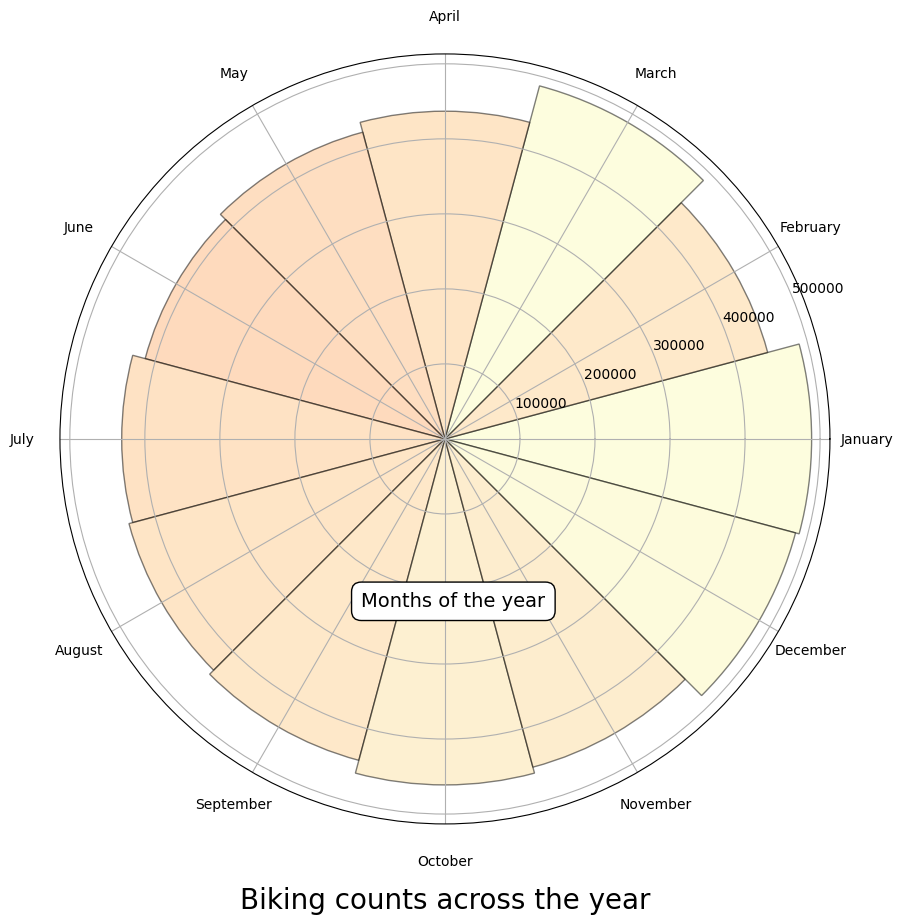

In [13]:
##13## Plotting polar plot of bike counts
##month list for xticks
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Month_data = Counts_data['Month'].value_counts().sort_index()
# Defining the number of hours in preperation for creatin the linespace
months = np.arange(0,12)
# Defining linespace
theta = np.linspace(0.0, 2*np.pi, len(months), endpoint=False)
# Defining the width of each bar
width = 2*np.pi / len(months)
## Mapping colors to the bars - using Viridis cmap
colors = plt.cm.magma(Month_data/Month_data.max())
## Adding the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize = (10,10))
## Filing in the bars
bars = ax.bar(theta, Month_data, width=width, align="center", alpha=0.5, color = colors, edgecolor='black')
## setting x-ticks
ax.set_xticks(theta)
## setting x-tick labels
# Setting x-tick labels with adjusted radial positions
for i, (label, angle) in enumerate(zip(month_names, theta)):
    ax.text(angle, ax.get_ylim()[1] + 50000, label, ha='center', va='center')
ax.set_xticklabels("")

##Setting labels
plt.text(4.25,250000, 'Months of the year' , fontsize = 14,color = "black",bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
## setting plot title
plt.title('Biking counts across the year', fontsize = 20, y=-0.12)
## Displaying plot
# Save the plot as an image
plt.savefig('polar_plot.png')
plt.show()



C:\Users\vikto\AppData\Local\Temp\ipykernel_26212\1254162493.py:32: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



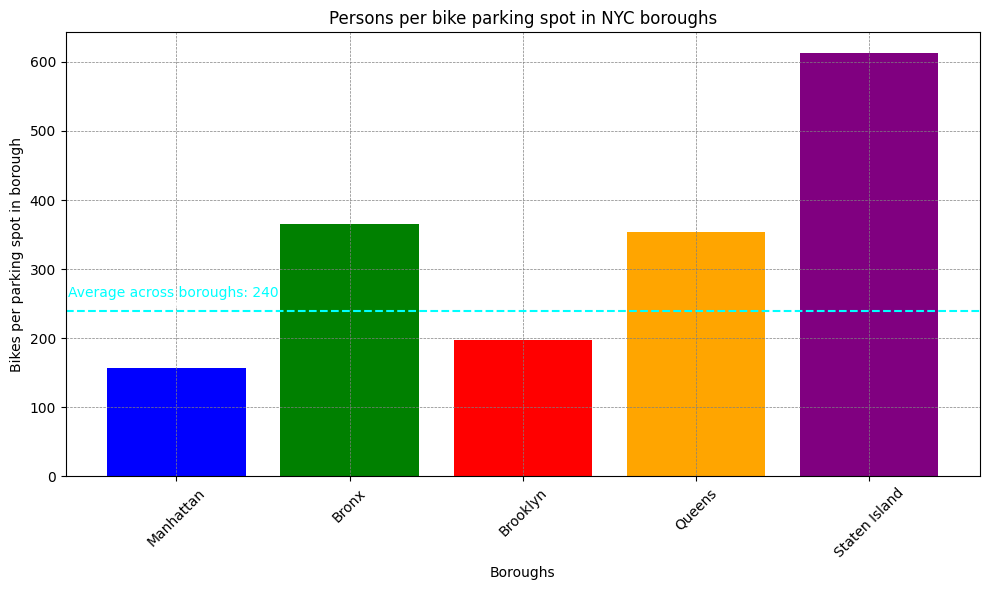

In [14]:

##14## Plotting parking/person ratios for the different boroughs
f =merged_df[merged_df['Year'] == 2023]
boroughs = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
manhattan = f[f['Borough']== 'Manhattan']
bronx = f[f['Borough']== 'Bronx']
brooklyn = f[f['Borough']== 'Brooklyn']
queens = f[f['Borough']== 'Queens']
staten_island = f[f['Borough']== 'Staten Island']

ratios_boroughs = [
    1 / manhattan['parking/person'].mean(),
    1 / bronx['parking/person'].mean(),
    1 / brooklyn['parking/person'].mean(),
    1 / queens['parking/person'].mean(),
    1 / staten_island['parking/person'].mean()
]
# Define colors for each borough
colors = ['blue', 'green', 'red', 'orange', 'purple']
# Plot
plt.figure(figsize=(10, 6))
plt.bar(boroughs, ratios_boroughs, color=colors)
plt.xlabel('Boroughs')
plt.ylabel('Bikes per parking spot in borough')
plt.title('Persons per bike parking spot in NYC boroughs')
plt.xticks(rotation=45)
# Custom legend for colors
legend_labels = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
# Set background color to black
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=240, color='cyan', linestyle='--')
# Add annotation
plt.annotate('Average across boroughs: 240', xy=(0.0, 240), xytext=(-0.625, 260),
             arrowprops=dict(facecolor='white', arrowstyle='->', connectionstyle='arc3', color='white'),
             color='cyan')

plt.tight_layout()
plt.savefig('ratiobars.png')
plt.show()